In [8]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier

In [9]:
x_test = pd.read_csv('x_test_openSmile_emobase.csv')
y_test = pd.read_csv('y_test_openSmile_emobase.csv')

y_test_f = pd.DataFrame(y_test['emotion'])

              precision    recall  f1-score   support

   not happy       0.93      0.93      0.93       530
       happy       0.66      0.67      0.67       107

    accuracy                           0.89       637
   macro avg       0.80      0.80      0.80       637
weighted avg       0.89      0.89      0.89       637



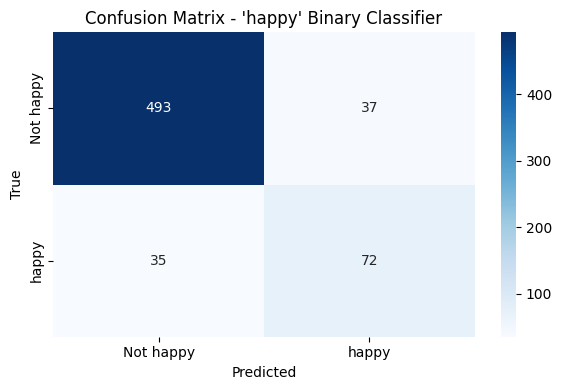

In [13]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'happy', 1, 0)

happy_model = joblib.load('happy_svc_model.pkl')
y_pred = happy_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not happy', 'happy']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not happy", "happy"],
    yticklabels=[f"Not happy", "happy"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'happy' Binary Classifier")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

   not angry       0.94      0.98      0.96       512
       angry       0.88      0.74      0.80       125

    accuracy                           0.93       637
   macro avg       0.91      0.86      0.88       637
weighted avg       0.93      0.93      0.93       637



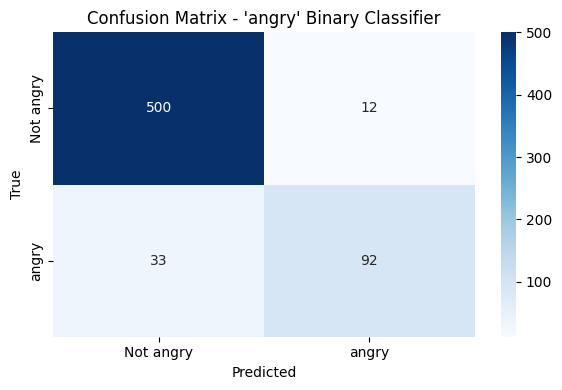

In [12]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'angry', 1, 0)

angry_model = joblib.load('angry_mlp_model.pkl')
y_pred = angry_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not angry', 'angry']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not angry", "angry"],
    yticklabels=[f"Not angry", "angry"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'angry' Binary Classifier")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

 not disgust       0.95      0.96      0.95       539
     disgust       0.75      0.72      0.74        98

    accuracy                           0.92       637
   macro avg       0.85      0.84      0.84       637
weighted avg       0.92      0.92      0.92       637



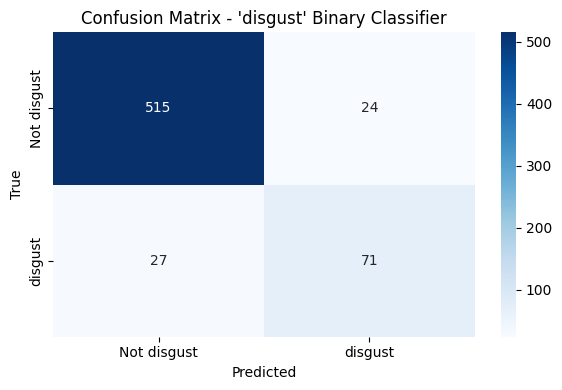

In [14]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'disgust', 1, 0)

disgust_model = joblib.load('disgust_svc_model.pkl')
y_pred = disgust_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not disgust', 'disgust']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not disgust", "disgust"],
    yticklabels=[f"Not disgust", "disgust"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'disgust' Binary Classifier")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

 not fearful       0.94      0.97      0.95       531
     fearful       0.82      0.68      0.74       106

    accuracy                           0.92       637
   macro avg       0.88      0.82      0.85       637
weighted avg       0.92      0.92      0.92       637



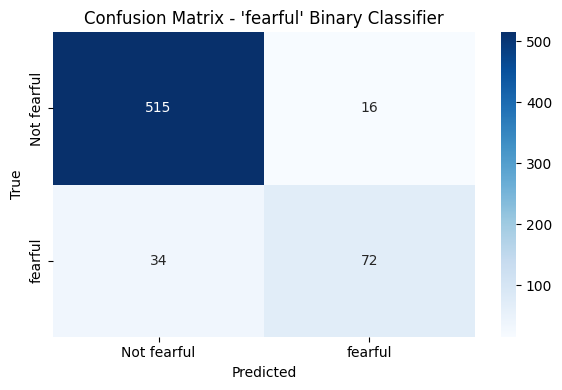

In [15]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'fearful', 1, 0)

fearful_model = joblib.load('fearful_mlp_model.pkl')
y_pred = fearful_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not fearful', 'fearful']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not fearful", "fearful"],
    yticklabels=[f"Not fearful", "fearful"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'fearful' Binary Classifier")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

 not neutral       0.96      0.96      0.96       540
     neutral       0.80      0.77      0.79        97

    accuracy                           0.94       637
   macro avg       0.88      0.87      0.87       637
weighted avg       0.93      0.94      0.94       637



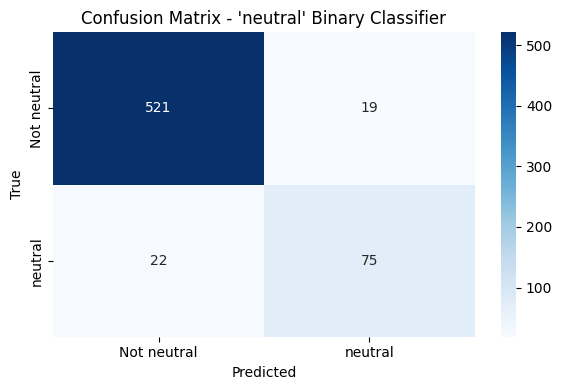

In [17]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'neutral', 1, 0)

neutral_model = joblib.load('neutral_mlp_model.pkl')
y_pred = neutral_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not neutral', 'neutral']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not neutral", "neutral"],
    yticklabels=[f"Not neutral", "neutral"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'neutral' Binary Classifier")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

     not sad       0.93      0.96      0.94       533
         sad       0.74      0.62      0.67       104

    accuracy                           0.90       637
   macro avg       0.83      0.79      0.81       637
weighted avg       0.90      0.90      0.90       637



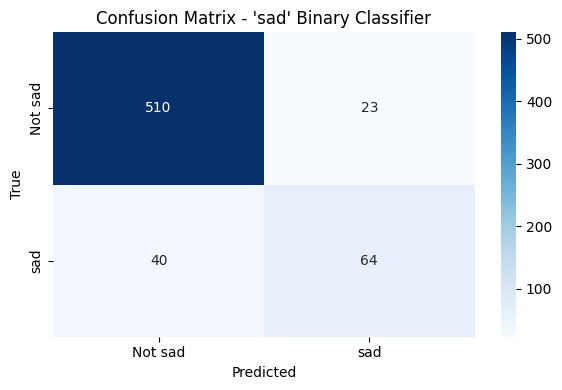

In [18]:
y_test_f['emotion'] = np.where(y_test['emotion'] == 'sad', 1, 0)

sad_model = joblib.load('sad_mlp_model.pkl')
y_pred = sad_model.predict(x_test)
print(classification_report(y_test_f['emotion'], y_pred, target_names=['not sad', 'sad']))

cm = confusion_matrix(y_test_f['emotion'], y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=[f"Not sad", "sad"],
    yticklabels=[f"Not sad", "sad"]
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - 'sad' Binary Classifier")
plt.tight_layout()
plt.show()